In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm
from numerize import numerize
import warnings
warnings.filterwarnings("ignore")

# Load data and overview

In [2]:
df = pd.read_csv("../data/Loan_default.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


# Clean data

In [4]:
pd.DataFrame({
    "null_count": df.isnull().sum(),
    "empty_str_count": (df == "").sum(),
    "zero_count": (df == 0).sum()
})

,null_count,empty_str_count,zero_count
LoanID,0,0,0
Age,0,0,0
Income,0,0,0
LoanAmount,0,0,0
CreditScore,0,0,0
MonthsEmployed,0,0,2122
NumCreditLines,0,0,0
InterestRate,0,0,0
LoanTerm,0,0,0
DTIRatio,0,0,0


<div class="alert alert-block alert-info"> <b>NOTE</b> Dataset này không có missing values và cũng không có giá trị empty string</div>

In [8]:
# check duplication
df.drop(columns=["LoanID"]).duplicated().sum()
# Ouput: 0
df.drop(columns=["LoanID", "Default"]).duplicated().sum()
# Ouput: 0

0

<div class="alert alert-block alert-info"> <b>NOTE</b> Dataset này không có dòng nào bị lặp/trùng hoàn toàn</div>

# EDA

In [11]:
num_cols = ["Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed",
            "NumCreditLines", "InterestRate", "LoanTerm", "DTIRatio"]

cat_cols = ["Default", "Education", "EmploymentType", "MaritalStatus",
            "HasMortgage", "HasDependents", "LoanPurpose", "HasCoSigner"]

print("# numerical variables =", len(num_cols))
print("# categorical variables =", len(num_cols))

# numerical variables = 9
# categorical variables = 9


## Univariate analysis: Numerical

### Distribution

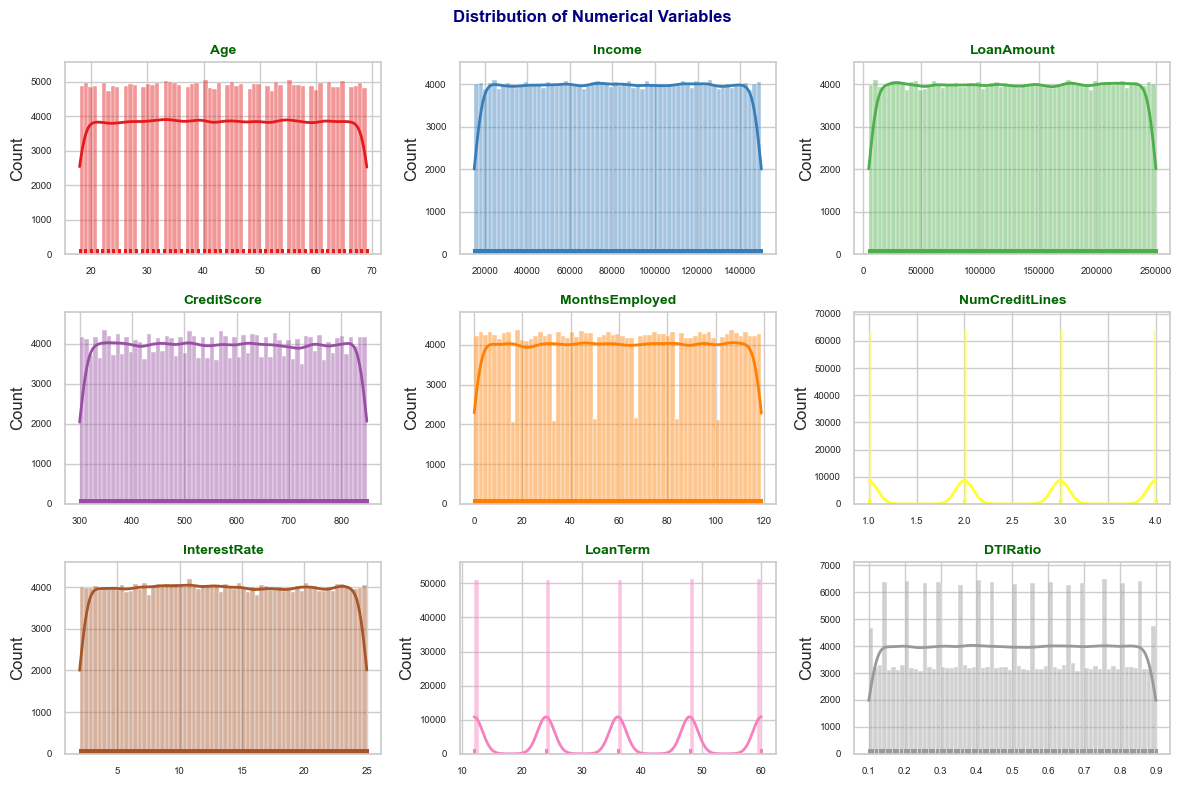

In [39]:
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Set1", n_colors=len(num_cols))  # coolwarm, Set1/2, Pastel1/2
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    color = palette[i]
    sns.histplot(data=df, x=col, stat="count", kde=True, line_kws={"linewidth": 2.0}, alpha=0.45, color=color, ax=axes[i])
    sns.rugplot(data=df, x=col, color=color, alpha=0.7, ax=axes[i])
    axes[i].set_xlabel("")
    axes[i].set_title(col, fontsize=10, fontweight="bold", color="darkgreen")
    axes[i].tick_params(labelsize=7)

fig.suptitle("Distribution of Numerical Variables", fontsize=12, fontweight="bold", color="navy")
fig.tight_layout()
plt.show()

In [26]:
df["NumCreditLines"].value_counts()

NumCreditLines
2    64130
3    63834
4    63829
1    63554
Name: count, dtype: int64

In [27]:
df["LoanTerm"].value_counts()

LoanTerm
48    51166
60    51154
36    51061
24    51009
12    50957
Name: count, dtype: int64

<div class="alert alert-block alert-info">
<p><strong>Nhận xét.</strong></p>
<ul>
    <li><strong>Age:</strong> phân phối gần như đồng đều trong khoảng 18–70 tuổi, không có độ lệch rõ rệt, cho thấy tập khách hàng trải dài ở nhiều nhóm tuổi.</li>
    <li><strong>Income:</strong> phân phối khá đồng đều trên toàn bộ khoảng 15,000–150,000, không xuất hiện outlier rõ rệt, phù hợp cho việc huấn luyện mô hình.</li>
    <li><strong>LoanAmount:</strong> cũng phân phối gần như đồng đều từ mức thấp tới cao, cho thấy đa dạng khoản vay trong dữ liệu.</li>
    <li><strong>CreditScore:</strong> phân phối đều từ 300–850, cho thấy dữ liệu bao quát toàn bộ thang điểm tín dụng tiêu chuẩn.</li>
    <li><strong>MonthsEmployed:</strong> phân phối đều từ 0–120 tháng, cho thấy dữ liệu có khách hàng mới đi làm và khách hàng đã đi làm lâu năm.</li>
    <li><strong>NumCreditLines:</strong> thuộc tính này là các số đếm, nên nhìn phân phối ta thấy có các spike ở các giá trị nguyên, điều này là bình thường. Ta cũng thấy số lượng tại các giá trị nguyên đó cũng khá đồng đều.</li>
    <li><strong>InterestRate:</strong> phân phối khá đồng đều trong khoảng 2–25%, không có đuôi lệch đặc biệt.</li>
    <li><strong>LoanTerm:</strong> thuộc tính này xét theo các kỳ hạn chuẩn (12, 24, 36, 48, 60 tháng), và cũng rất đồng đều, phản ánh các lựa chọn vay phổ biến.</li>
    <li><strong>DTIRatio:</strong> phân phối đều, tuy nhiên xuất hiện các spike tại các giá trị đặc trưng, phản ánh các giới hạn DTI định sẵn trong hệ thống cho vay.</li>
</ul>
</div>

### skewness and kurtosis

In [27]:
df[num_cols].skew()

Age               0.000698
Income           -0.000381
LoanAmount       -0.001827
CreditScore       0.004688
MonthsEmployed   -0.002142
NumCreditLines   -0.000278
InterestRate      0.004608
LoanTerm         -0.002178
DTIRatio         -0.001499
dtype: float64

In [28]:
df[num_cols].kurtosis()

Age              -1.198431
Income           -1.198361
LoanAmount       -1.203680
CreditScore      -1.200302
MonthsEmployed   -1.199632
NumCreditLines   -1.357671
InterestRate     -1.197167
LoanTerm         -1.299895
DTIRatio         -1.199675
dtype: float64

### Distribution with respect to normal distribution

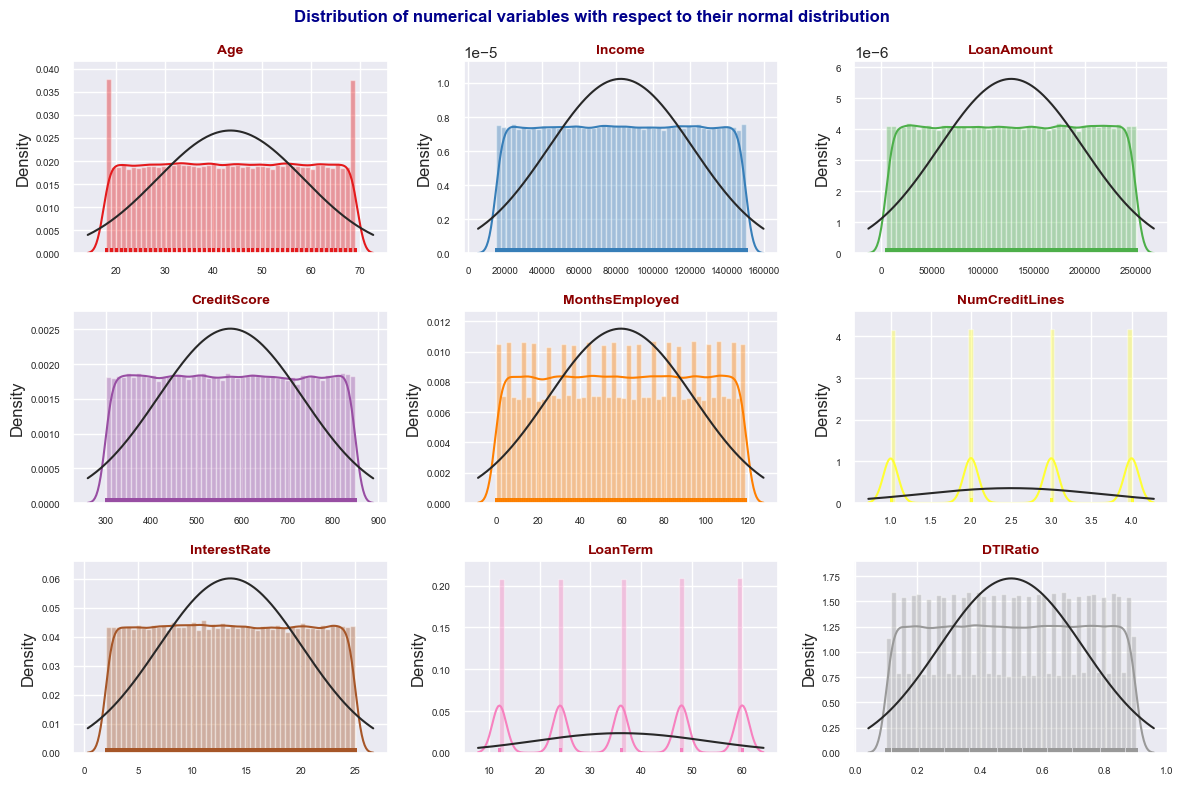

In [41]:
sns.set_style("darkgrid")
palette = sns.color_palette("Set1", n_colors=len(num_cols))  # coolwarm, Set1/2, Pastel1/2
fig,axes = plt.subplots(nrows = 3, ncols = 3, figsize = (12,8))
axes = axes.flat

for i, col in enumerate(num_cols):
    sns.distplot(df[col],
               fit = norm,
               rug = True,
               color = palette[i],
               ax = axes[i])
    axes[i].set_xlabel("")
    axes[i].set_title(f"{col}", fontsize = 10, fontweight = "bold", color = "darkred")
    axes[i].tick_params(labelsize = 7)

fig.suptitle("Distribution of numerical variables with respect to their normal distribution", fontsize = 12, fontweight = "bold", color = "darkblue")
fig.tight_layout()
fig.show()

## Univariate analysis: Categorical

In [42]:
for col in cat_cols:
  print(f"{col} =>\t{df[col].nunique()} values: {df[col].unique().tolist()}")

Default =>	2 values: [0, 1]
Education =>	4 values: ["Bachelor's", "Master's", 'High School', 'PhD']
EmploymentType =>	4 values: ['Full-time', 'Unemployed', 'Self-employed', 'Part-time']
MaritalStatus =>	3 values: ['Divorced', 'Married', 'Single']
HasMortgage =>	2 values: ['Yes', 'No']
HasDependents =>	2 values: ['Yes', 'No']
LoanPurpose =>	5 values: ['Other', 'Auto', 'Business', 'Home', 'Education']
HasCoSigner =>	2 values: ['Yes', 'No']


### Distribution

In [41]:
from numerize import numerize

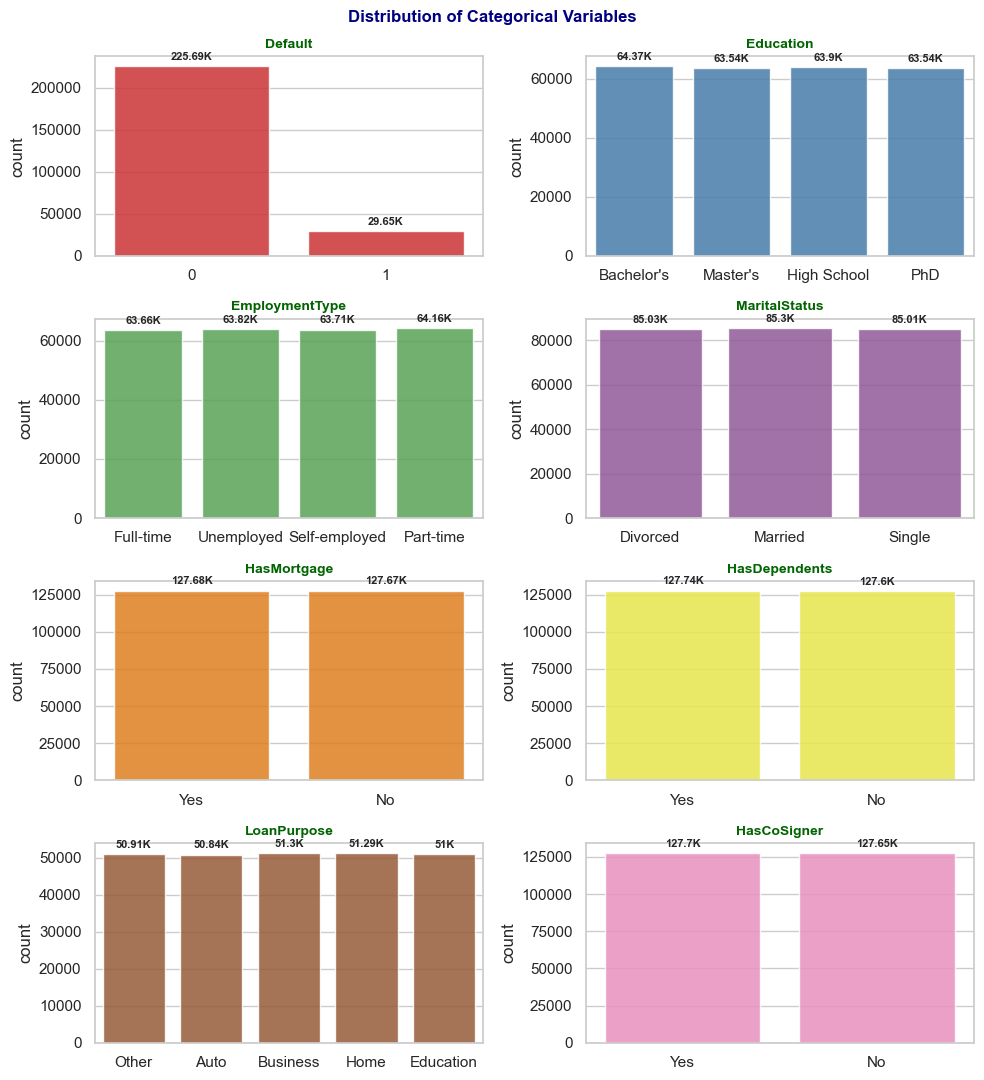

In [42]:
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Set1", n_colors=len(cat_cols))
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 11))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i], color=palette[i], alpha=0.85)
    axes[i].set_xlabel("")
    axes[i].set_title(col, fontsize=10, fontweight="bold", color="darkgreen")

    # Annotate on top of bars
    for rect in axes[i].patches:
        height = rect.get_height()
        axes[i].annotate(
            numerize.numerize(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=8,
            fontweight="bold"
        )

fig.suptitle("Distribution of Categorical Variables", fontsize=12, fontweight="bold", color="navy")
fig.tight_layout()
plt.show()

In [45]:
# fig.savefig("eda_categorical_distribution.png", dpi=300, bbox_inches='tight')

## Bivariate analysis

### Correlation matrix of numerical variables
- We use the Spearman correlation since the variables do not come from a normal distribution

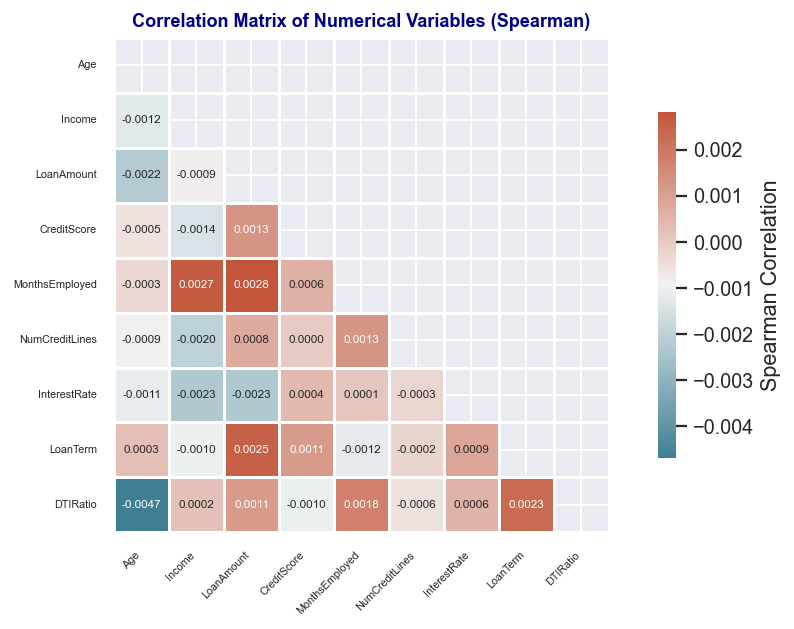

In [46]:
sns.set_style("darkgrid")
corr_matrix = df[num_cols].corr(method="spearman")
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(8, 5), dpi=130)
cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(
    corr_matrix,
    cmap=cmap,
    annot=True,
    fmt=".4f",
    annot_kws={"fontsize": 6.5},
    square=True,
    mask=mask,
    linewidths=0.8,
    linecolor="white",
    cbar_kws={"shrink": 0.7, "label": "Spearman Correlation"},
    ax=ax
)

# Clean ticks
ax.tick_params(labelsize=6)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.setp(ax.get_yticklabels(), rotation=0)

ax.set_title(
    "Correlation Matrix of Numerical Variables (Spearman)",
    fontsize=10,
    fontweight="bold",
    color="darkblue"
)

plt.tight_layout()
plt.show()

In [47]:
# fig.savefig("eda_correlation_heatmap.png", dpi=300, bbox_inches='tight')

### Distribution of numerical variables versus target

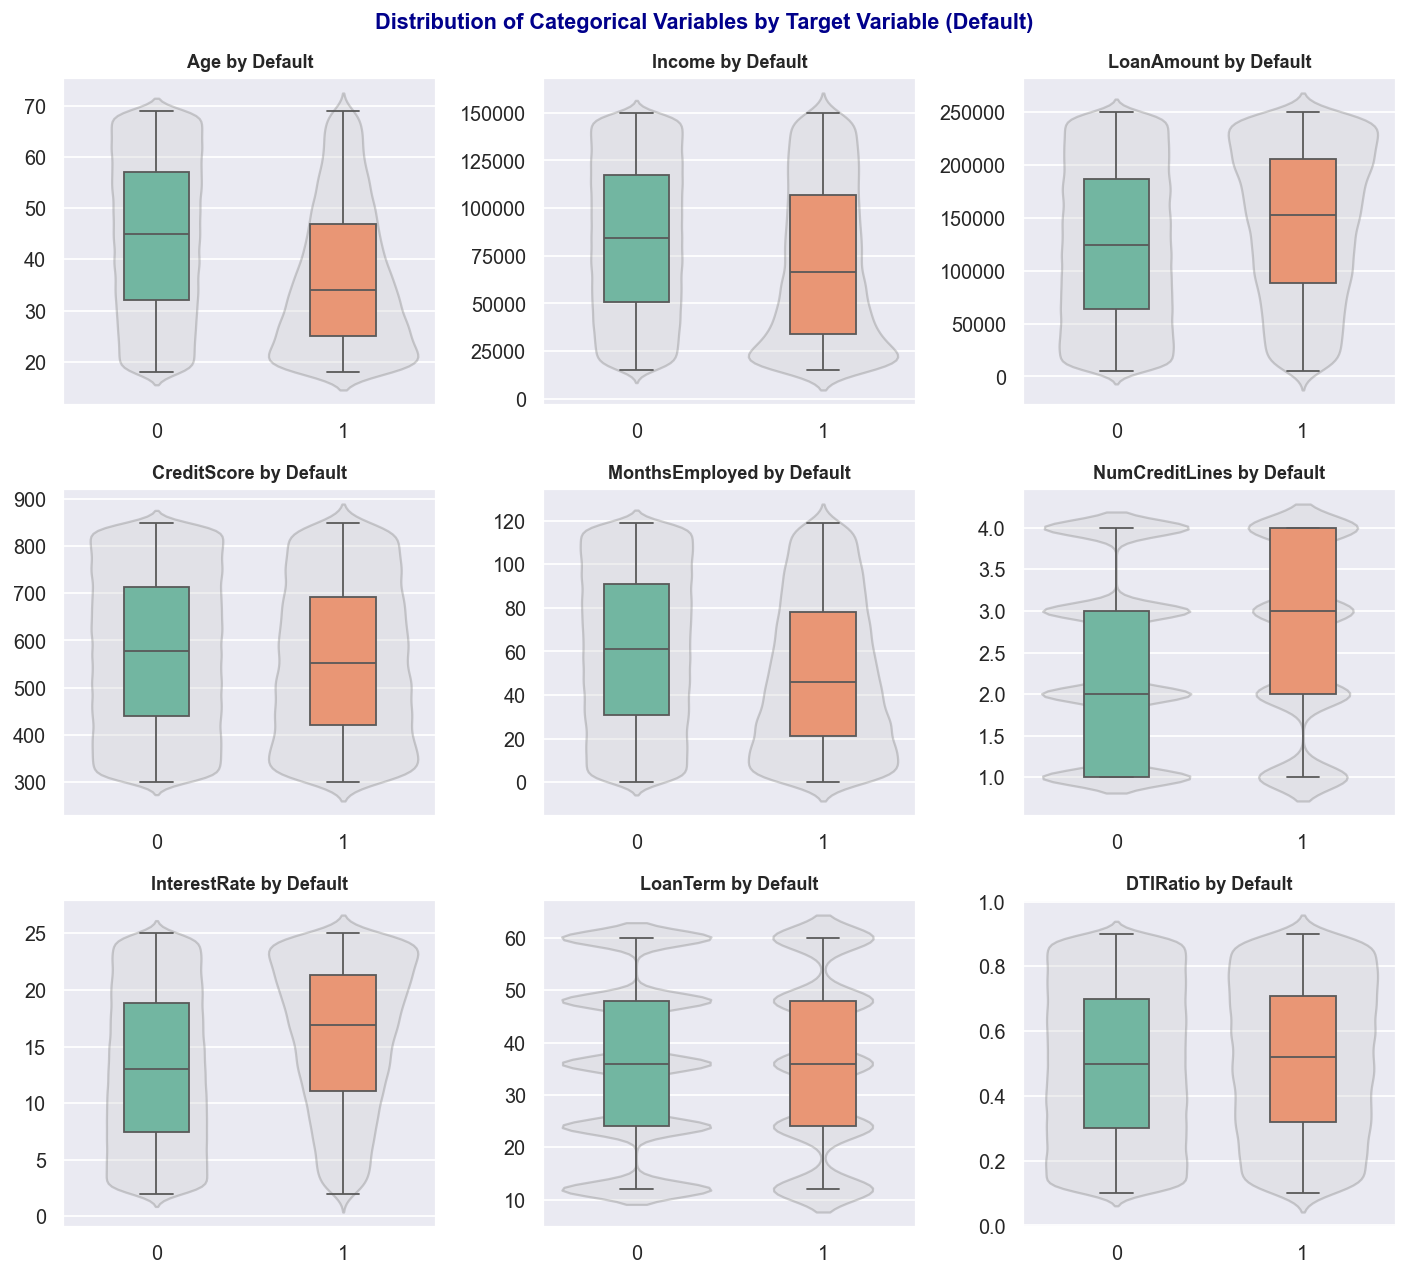

In [51]:
sns.set_style("darkgrid")
n = len(num_cols)
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(11, 10), dpi=130)
axes = axes.flatten()


palette = sns.color_palette("Set2")
for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.violinplot(data=df, x="Default", y=col, ax=ax, inner=None, color="lightgray", alpha=0.35)
    sns.boxplot(data=df, x="Default", y=col, width=0.35, palette=palette, showfliers=False, ax=ax)

    ax.set_title(f"{col} by Default", fontsize=10, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("")

# Remove unused axes (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle(
    "Distribution of Categorical Variables by Target Variable (Default)",
    fontsize=12, fontweight="bold", color="darkblue"
)

plt.tight_layout()
plt.show()

### Distribution of categorical variables versus target

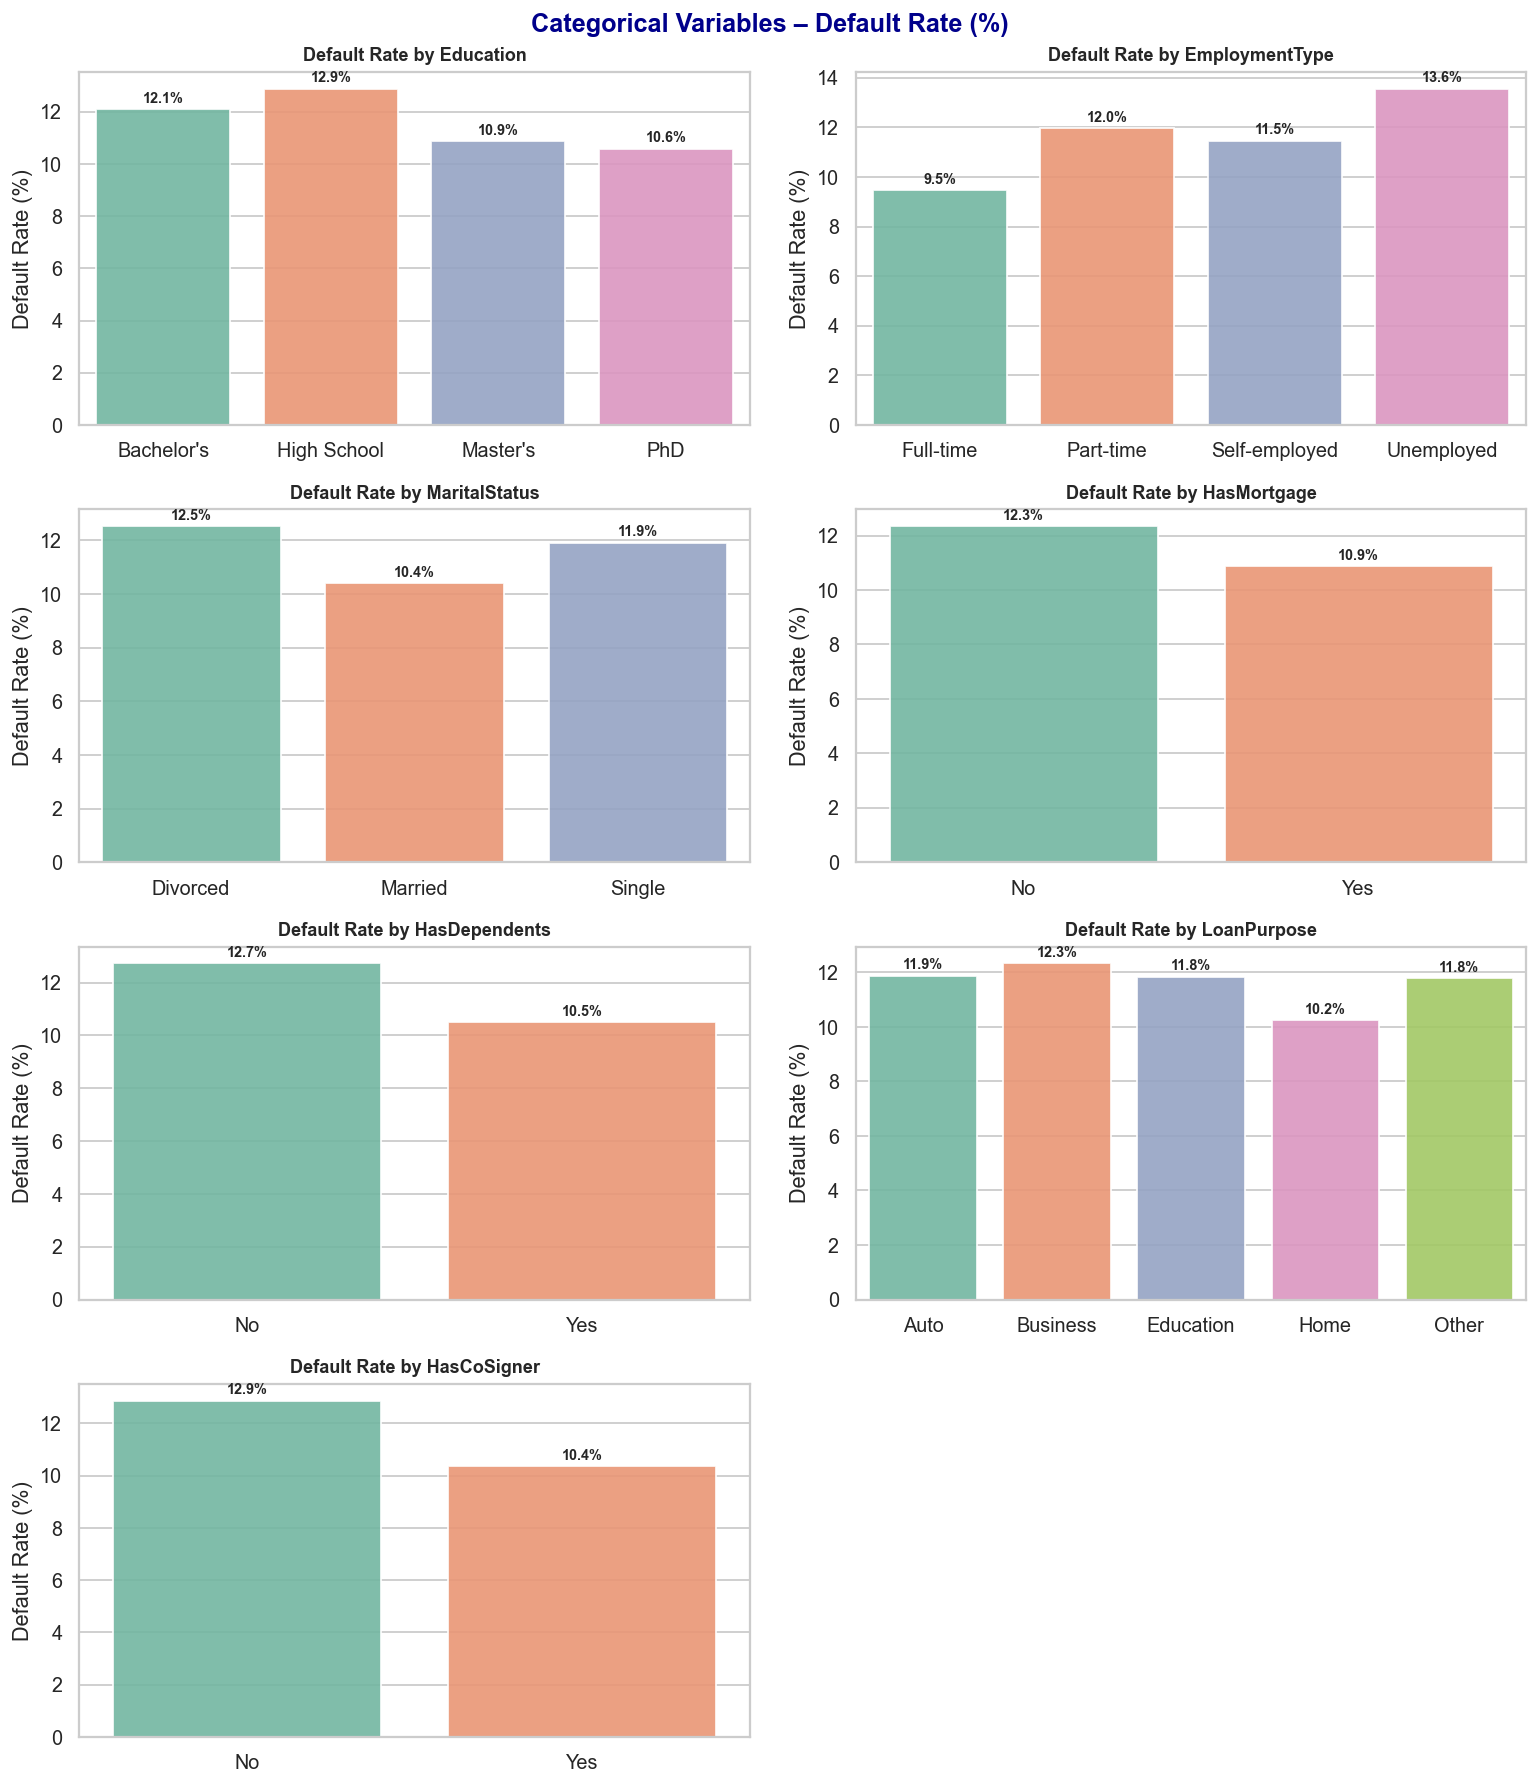

In [51]:
sns.set_theme(style="whitegrid")
n = len(cat_cols)
rows = 4
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 14), dpi=130)
axes = axes.flatten()

for i, col in enumerate([c for c in cat_cols if c != "Default"]):

    # Compute default rate for each category
    tmp = (
        df.groupby(col)["Default"]
        .mean()
        .reset_index()
        .rename(columns={"Default": "DefaultRate"})
    )
    tmp["DefaultRate"] *= 100  # convert to %

    # Barplot default rate
    sns.barplot(
        data=tmp,
        x=col,
        y="DefaultRate",
        ax=axes[i],
        palette="Set2",
        alpha=0.9
    )

    # Formatting
    axes[i].set_title(f"Default Rate by {col}", fontsize=10, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Default Rate (%)")

    # Add annotations
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(
            f"{height:.1f}%",
            (p.get_x() + p.get_width() / 2, height),
            ha="center",
            va="bottom",
            fontsize=8,
            weight="bold",
            xytext=(0, 2),
            textcoords="offset points"
        )

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(
    "Categorical Variables – Default Rate (%)",
    fontsize=14,
    fontweight="bold",
    color="darkblue"
)

plt.tight_layout()
plt.show()

In [49]:
fig.savefig("eda_categorical_vs_default.png", dpi=300, bbox_inches='tight')

### Distribution of numerical vs. categorical variable pairs

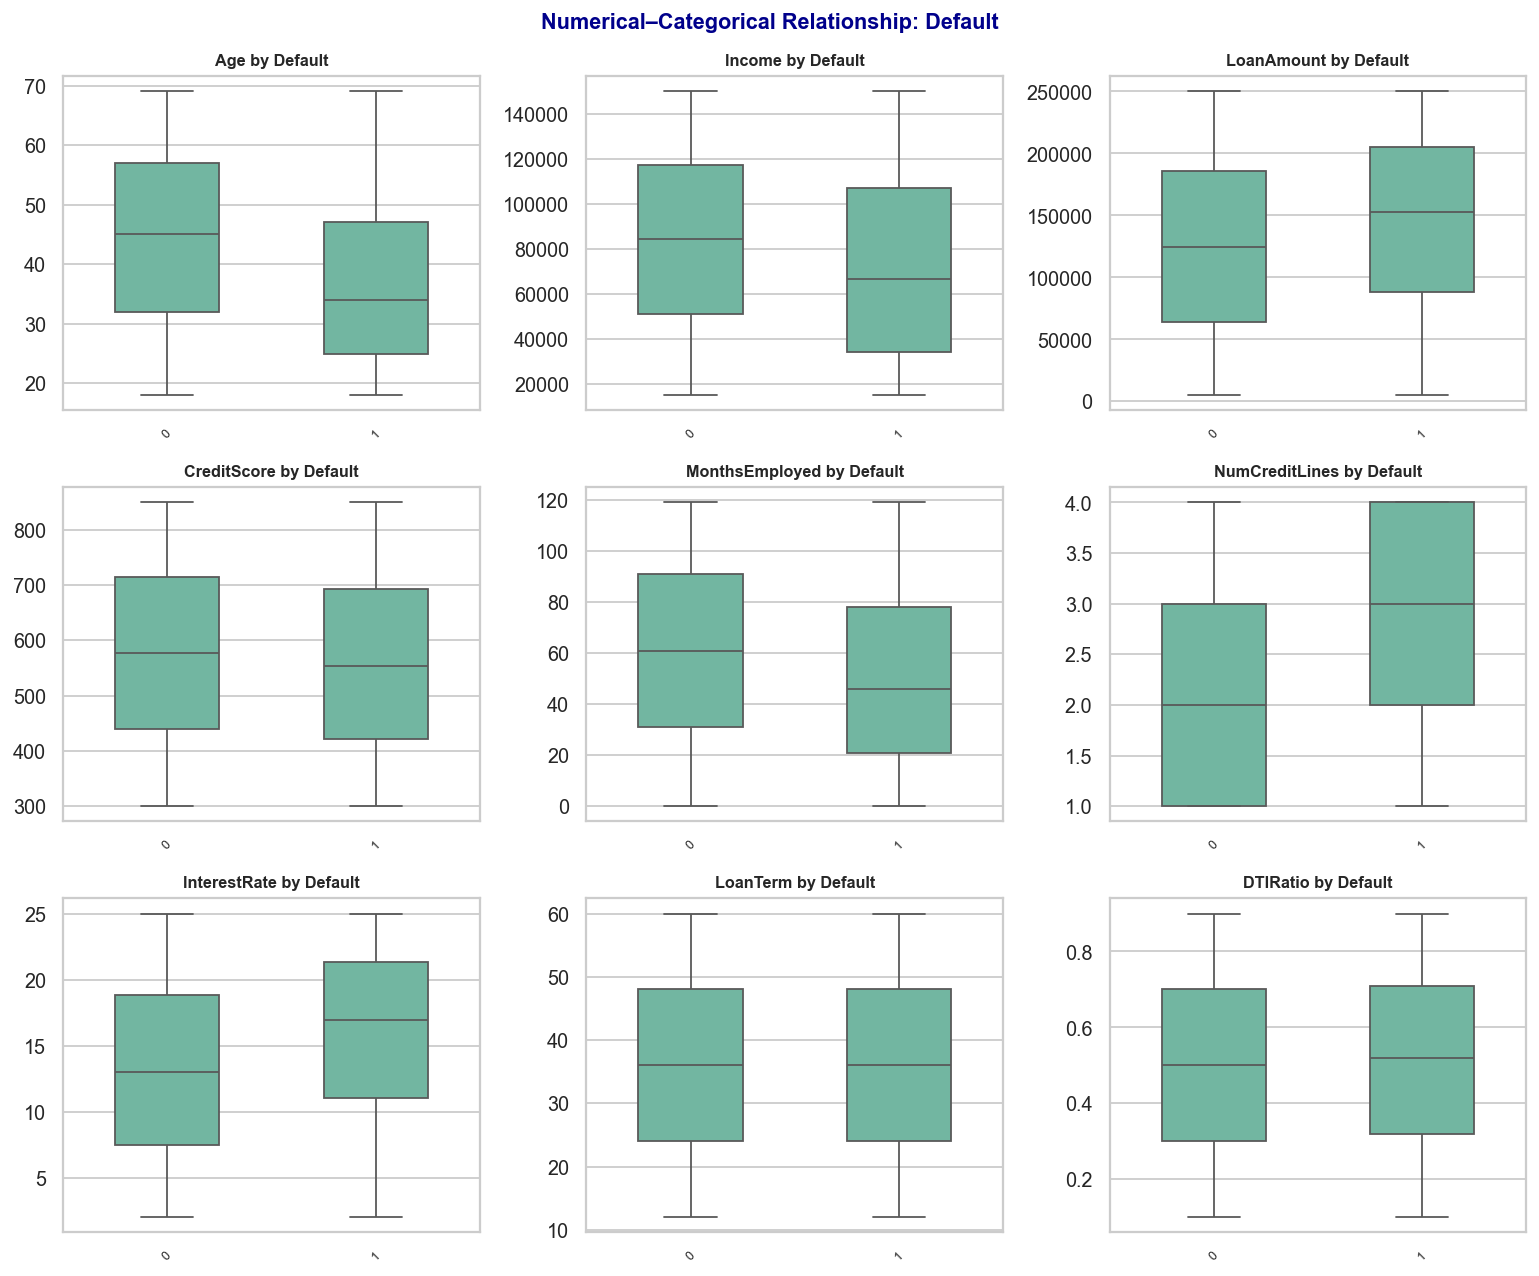

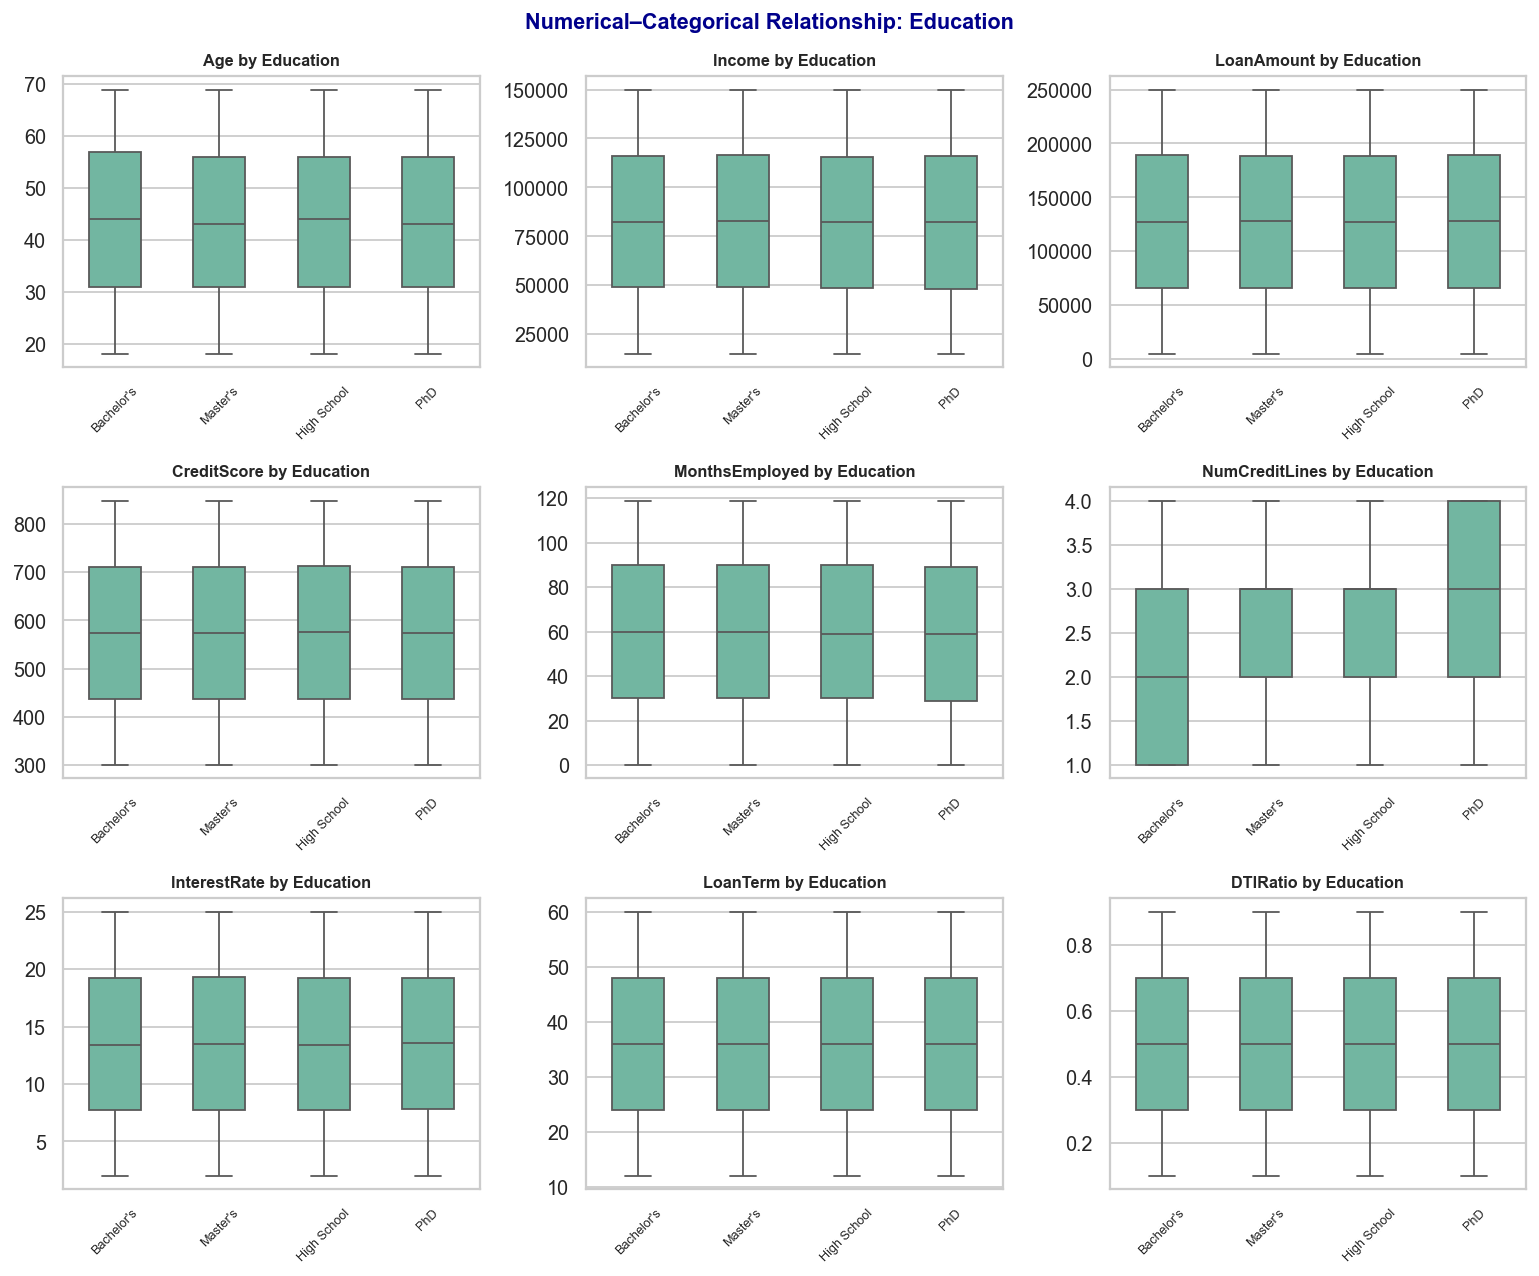

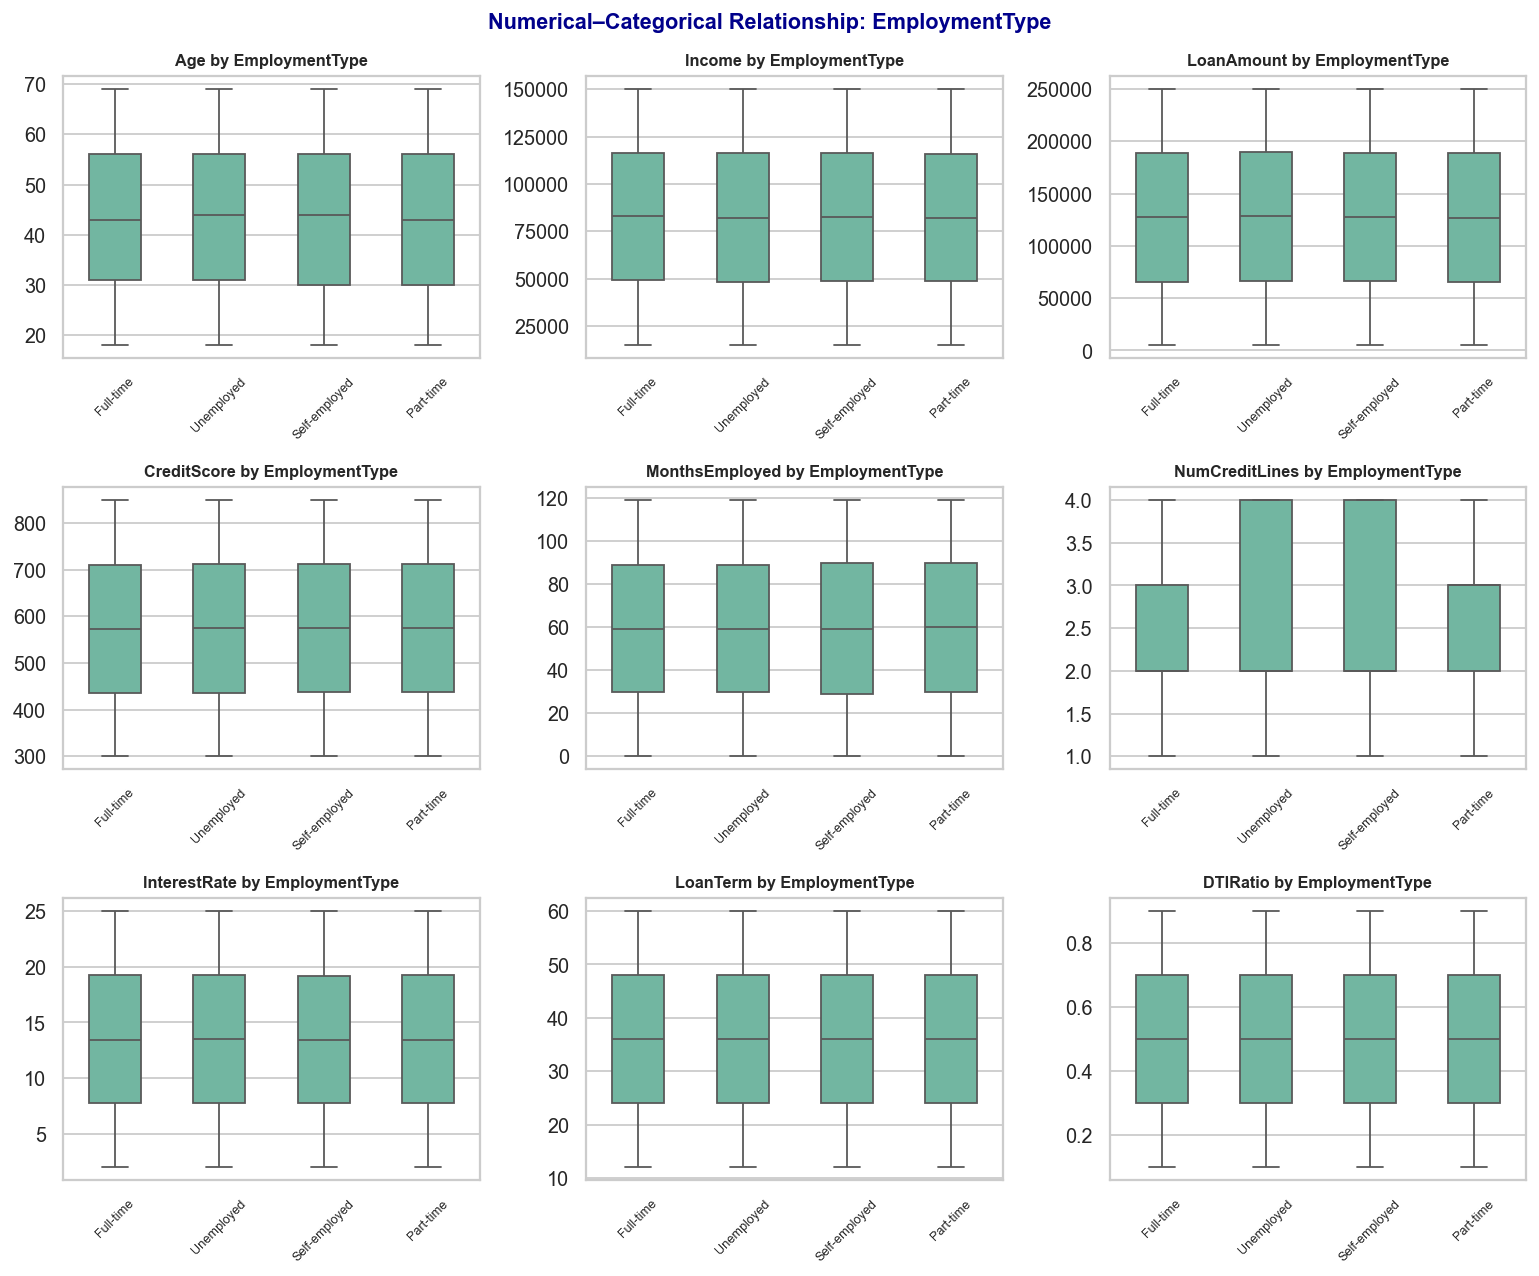

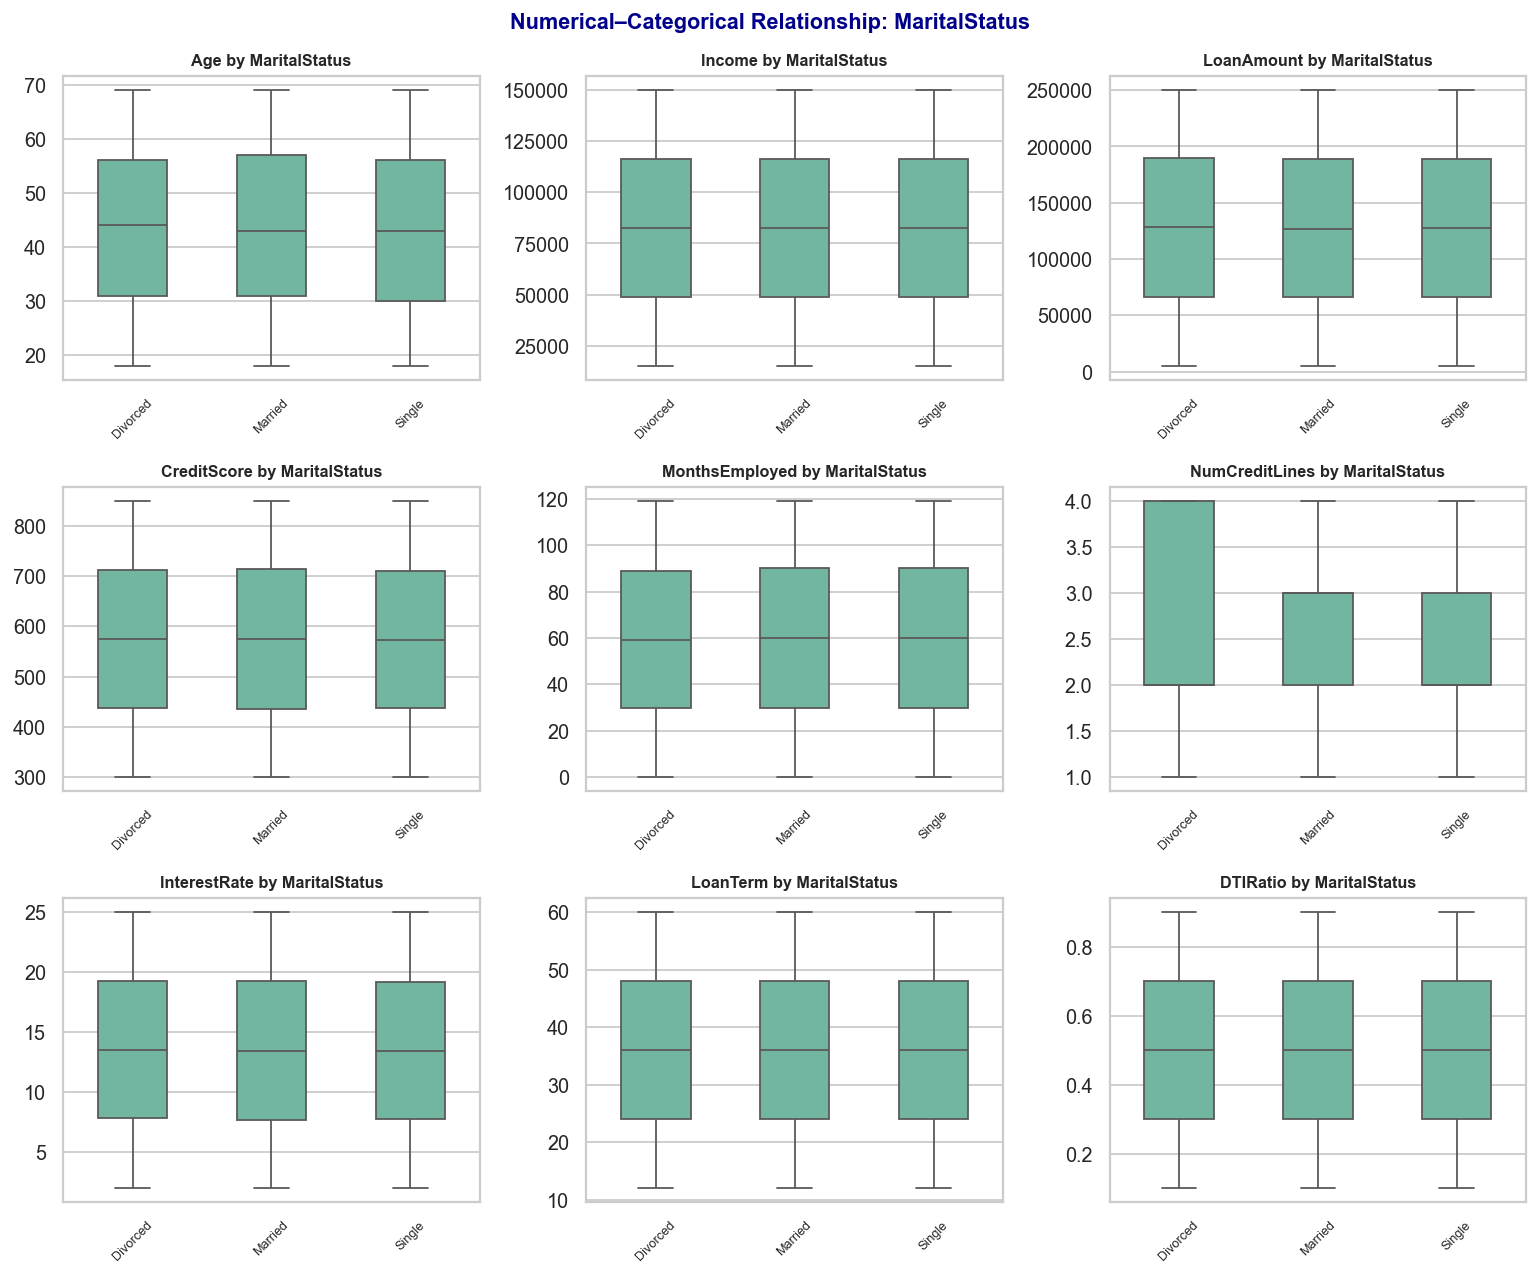

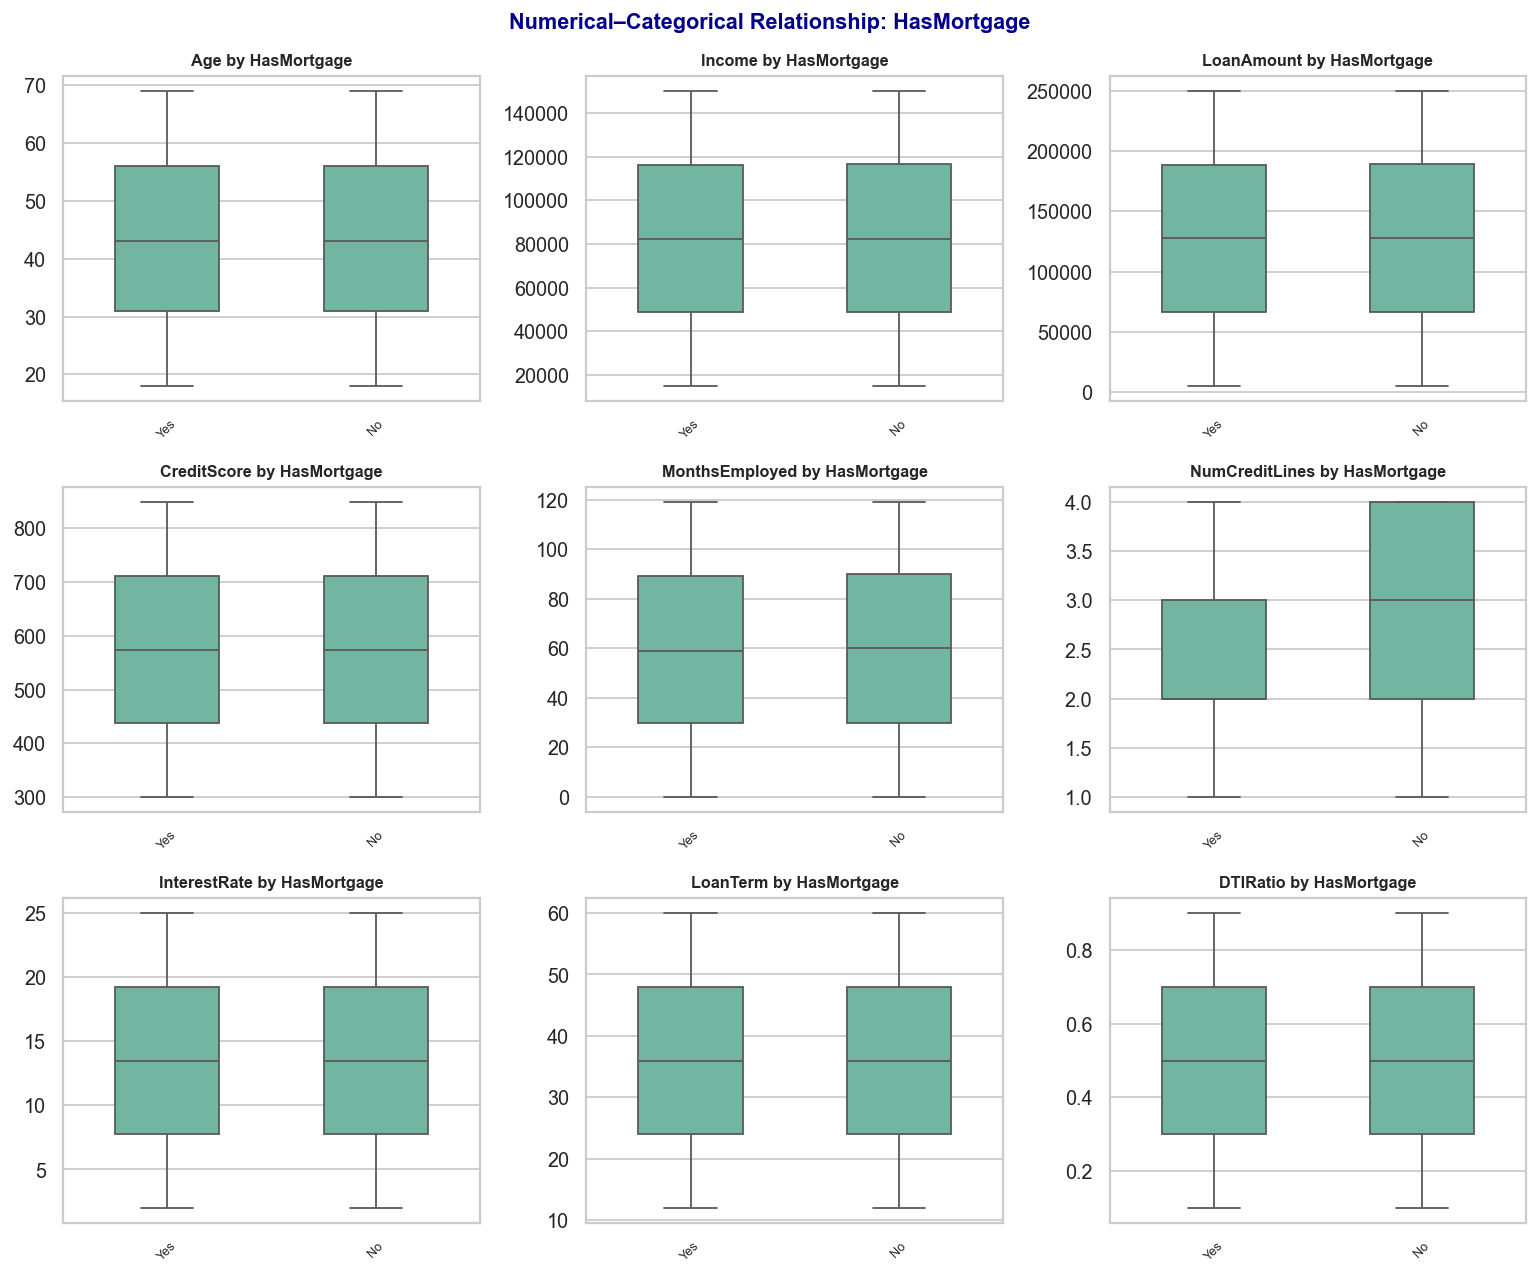

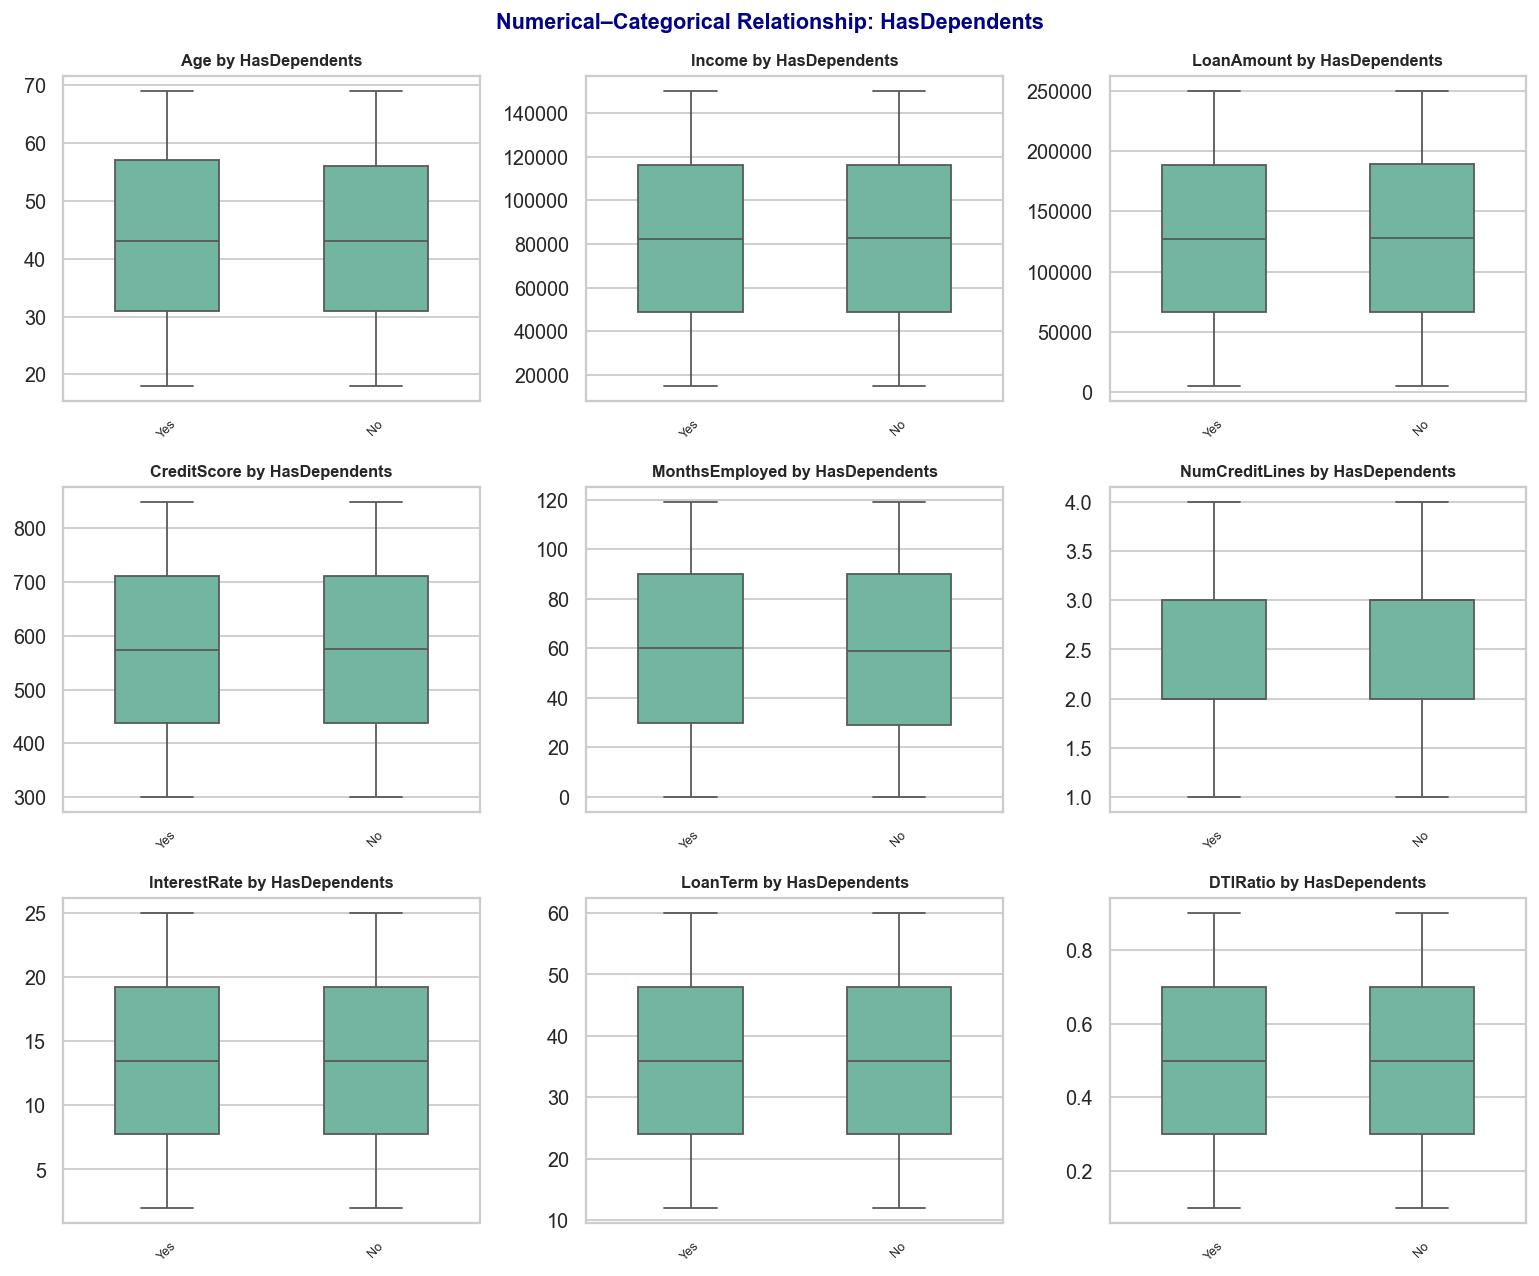

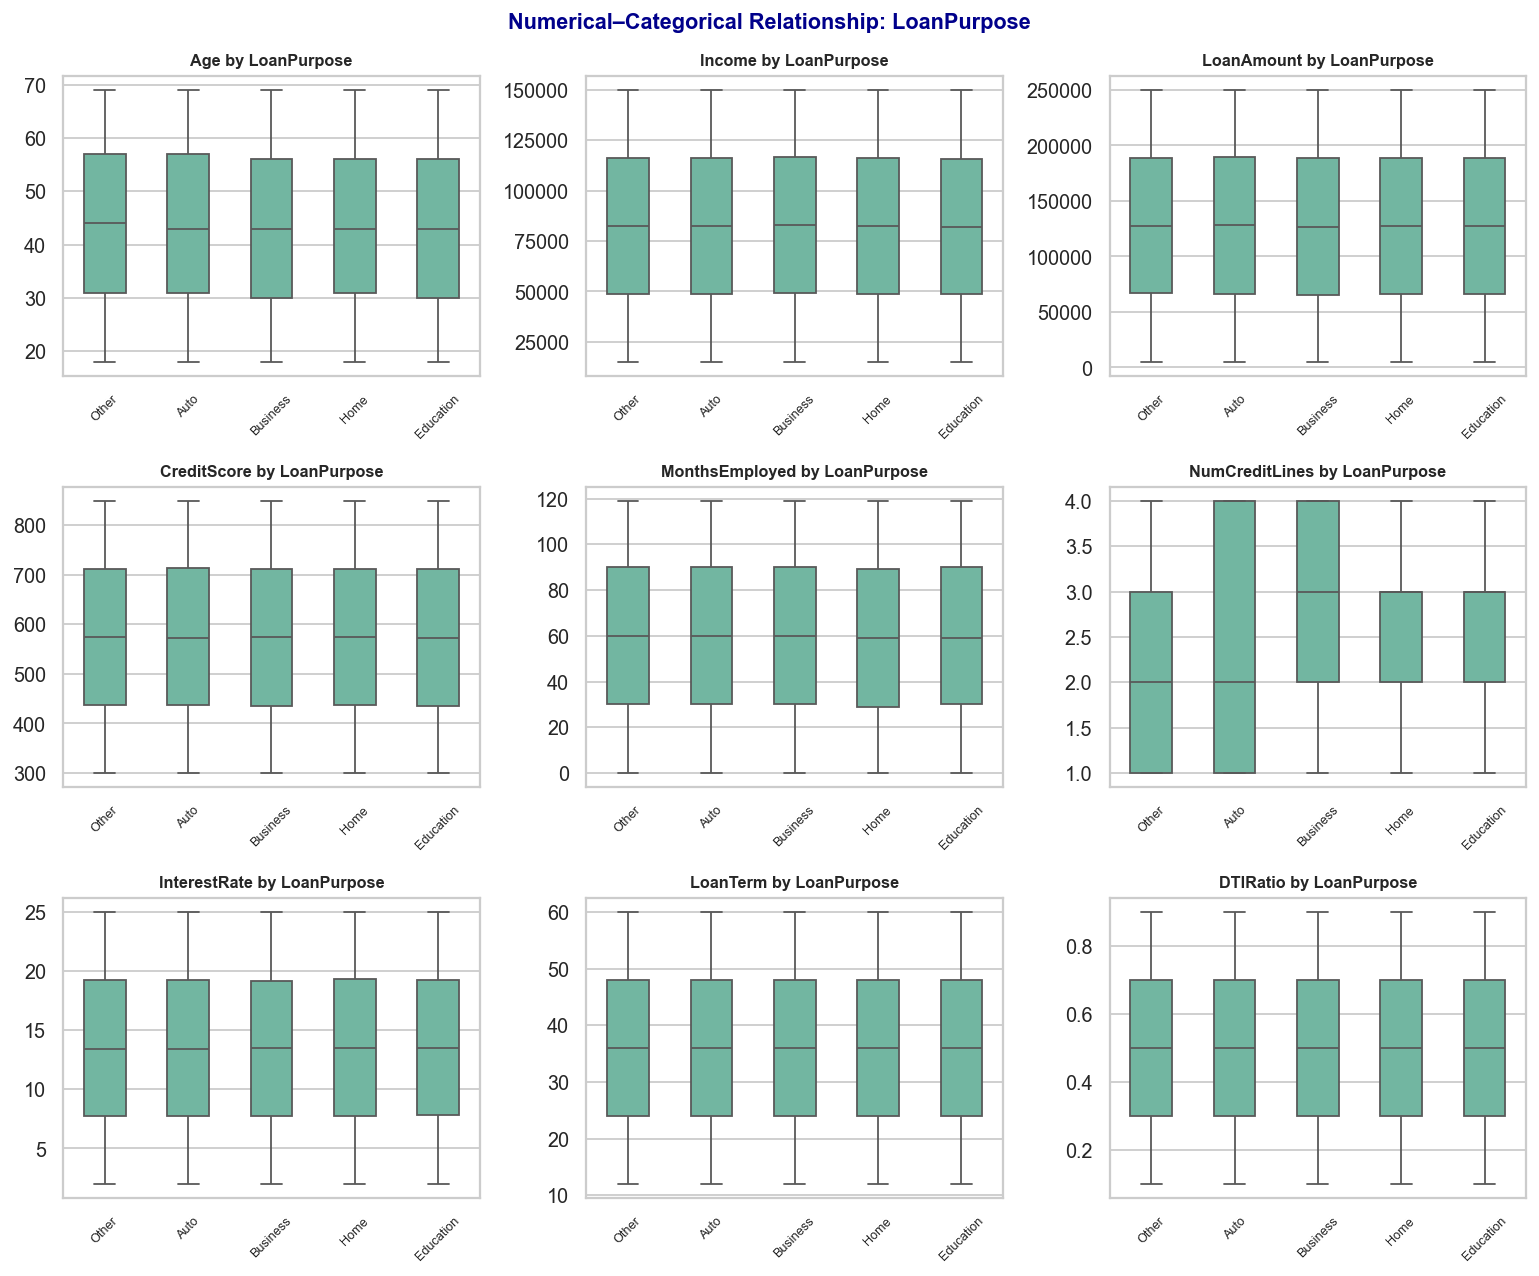

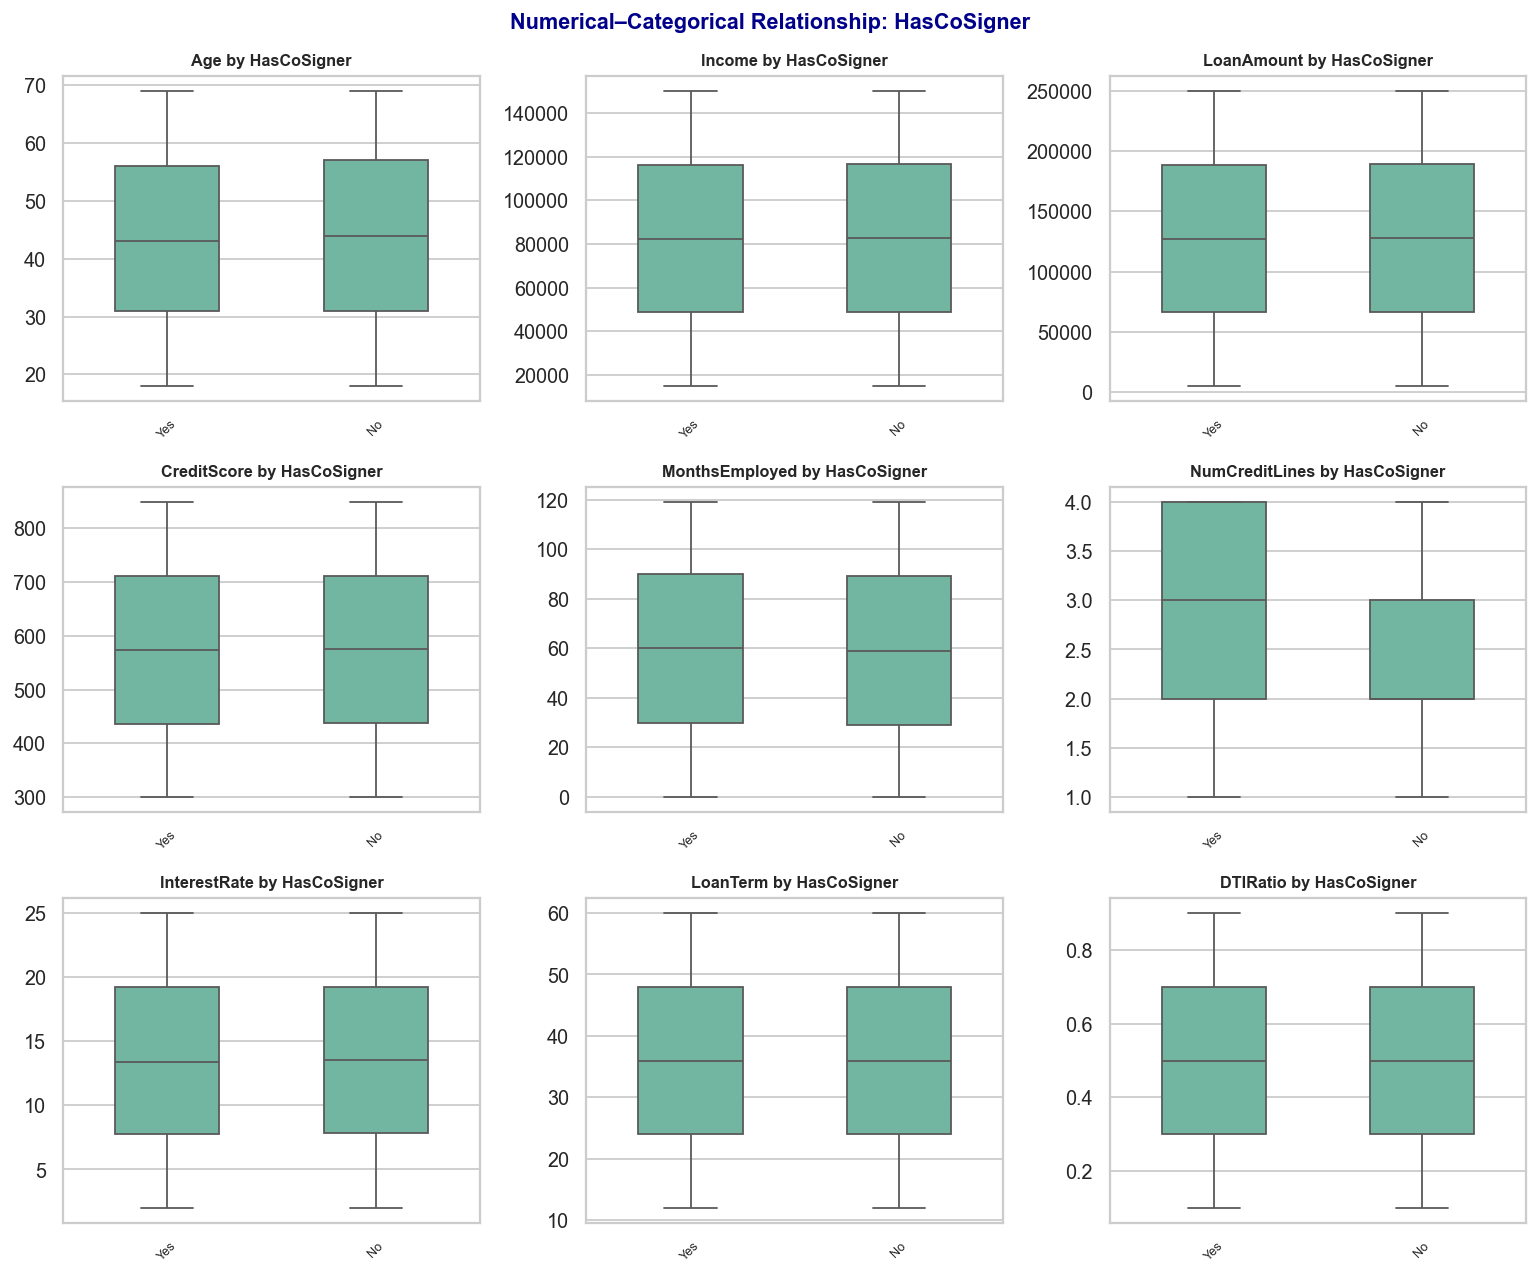

In [52]:
sns.set_theme(style="whitegrid", palette="Set2")

# Settings
rows = 3
cols = 3

for cat in cat_cols:
    fig, axes = plt.subplots(rows, cols, figsize=(12, 10), dpi=130)
    axes = axes.flatten()

    for i, num in enumerate(num_cols):
        ax = axes[i]

        sns.boxplot(
            data=df,
            x=cat,
            y=num,
            ax=ax,
            showfliers=False,
            width=0.5
        )

        ax.set_title(
            f"{num} by {cat}",
            fontsize=9,
            fontweight="bold"
        )
        ax.set_xlabel("")
        ax.set_ylabel("")

        # Rotate x labels for readability
        ax.tick_params(axis='x', rotation=45, labelsize=7)

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(
        f"Numerical–Categorical Relationship: {cat}",
        fontsize=12,
        fontweight="bold",
        color="darkblue"
    )

    plt.tight_layout()
    plt.show()
